In [10]:
import numpy as np
import sympy
from scipy.integrate import odeint
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import curve_fit

In [11]:
df_Ag = pd.read_csv('Ag.csv')
df_Ag1 = pd.read_csv('Ag1.csv')
df_Ag2 = pd.read_csv('Ag2.csv')

In [12]:
def model_SAD(I,t,k,A,alpha,beta):
    Na,Ns,Nd = I
    dNa = beta*Ns+k*(1-Na/(A-Nd-Ns))*Na
    dNs = -alpha*Ns-beta*Ns
    dNd = alpha*Ns
    return np.array([dNa,dNs,dNd])
def fit_model_SAD(t,k,A,alpha,beta):
    return odeint(model_SAD,(Na0,Ns0,Nd0),t,args=(k,A,alpha,beta))
def fit_od(t,k,A,alpha,beta):
    return np.sum(fit_model_SAD(t,k,A,alpha,beta),axis=1)
def fit_CFU(t,k,A,alpha,beta):
    return np.sum(fit_model_SAD(t,k,A,alpha,beta)[:,0:2],axis=1)
def Gompertz(t, N0, A, lamta, Um):
    return N0+(A-N0)*np.exp(-np.exp(Um*np.exp(1)*(lamta-t)/(A-N0) + 1))

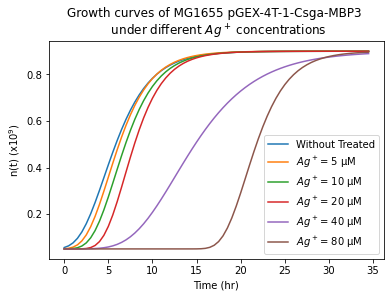

In [13]:
## MG1655- pGEX-4T-1-Csga-MBP3
t = np.arange(0,35,0.5)
y11 = Gompertz(t, N0 = 0.05, A = 0.9, lamta = 1.71, Um = 0.11)
y21 = Gompertz(t, N0 = 0.05, A = 0.9, lamta = 2.43, Um = 0.12)
y31 = Gompertz(t, N0 = 0.05, A = 0.9, lamta = 3.15, Um = 0.12)
y41 = Gompertz(t, N0 = 0.05, A = 0.9, lamta = 4.46, Um = 0.13)
y51 = Gompertz(t, N0 = 0.05, A = 0.9, lamta = 7.63, Um = 0.063)
y61 = Gompertz(t, N0 = 0.05, A = 0.9, lamta = 18, Um = 0.12)

plt.plot(t, y11, label = 'Without Treated')
plt.plot(t, y21, label = '$Ag^+$= 5 μM')
plt.plot(t, y31, label = '$Ag^+$= 10 μM')
plt.plot(t, y41, label = '$Ag^+$= 20 μM')
plt.plot(t, y51, label = '$Ag^+$= 40 μM')
plt.plot(t, y61, label = '$Ag^+$= 80 μM')

plt.xlabel("Time (hr)")
plt.ylabel("n(t) (x10$^{9}$)")
plt.legend(loc=4)
plt.title('Growth curves of MG1655 pGEX-4T-1-Csga-MBP3 \n under different $Ag^+$ concentrations')
plt.show()

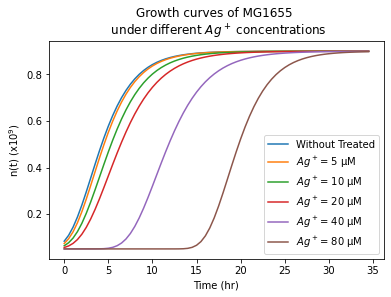

In [14]:
## MG1655
t = np.arange(0,35,0.5)
y11 = Gompertz(t, N0 = 0.05, A = 0.9, lamta = 0.46, Um = 0.12)
y21 = Gompertz(t, N0 = 0.05, A = 0.9, lamta = 0.73, Um = 0.12)
y31 = Gompertz(t, N0 = 0.05, A = 0.9, lamta = 1.19, Um = 0.11)
y41 = Gompertz(t, N0 = 0.05, A = 0.9, lamta = 1.86, Um = 0.10)
y51 = Gompertz(t, N0 = 0.05, A = 0.9, lamta = 7.30, Um = 0.10)
y61 = Gompertz(t, N0 = 0.05, A = 0.9, lamta = 16, Um = 0.12)

plt.plot(t, y11, label = 'Without Treated')
plt.plot(t, y21, label = '$Ag^+$= 5 μM')
plt.plot(t, y31, label = '$Ag^+$= 10 μM')
plt.plot(t, y41, label = '$Ag^+$= 20 μM')
plt.plot(t, y51, label = '$Ag^+$= 40 μM')
plt.plot(t, y61, label = '$Ag^+$= 80 μM')


plt.xlabel("Time (hr)")
plt.ylabel("n(t) (x10$^{9}$)")
plt.legend(loc=4)
plt.title('Growth curves of MG1655 \n under different $Ag^+$ concentrations')
plt.show()

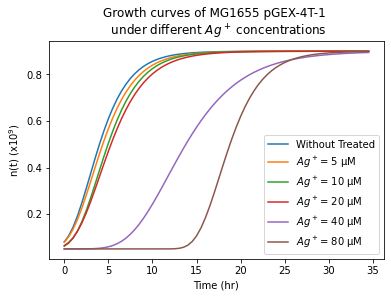

In [15]:
## MG1655- pGEX-4T-1
t = np.arange(0,35,0.5)
y11 = Gompertz(t, N0 = 0.05, A = 0.9, lamta = 0.50, Um = 0.13)
y21 = Gompertz(t, N0 = 0.05, A = 0.9, lamta = 0.58, Um = 0.12)
y31 = Gompertz(t, N0 = 0.05, A = 0.9, lamta = 1.18, Um = 0.12)
y41 = Gompertz(t, N0 = 0.05, A = 0.9, lamta = 1.17, Um = 0.11)
y51 = Gompertz(t, N0 = 0.05, A = 0.9, lamta = 7.30, Um = 0.07)
y61 = Gompertz(t, N0 = 0.05, A = 0.9, lamta = 15, Um = 0.12)

plt.plot(t, y11, label = 'Without Treated')
plt.plot(t, y21, label = '$Ag^+$= 5 μM')
plt.plot(t, y31, label = '$Ag^+$= 10 μM')
plt.plot(t, y41, label = '$Ag^+$= 20 μM')
plt.plot(t, y51, label = '$Ag^+$= 40 μM')
plt.plot(t, y61, label = '$Ag^+$= 80 μM')


plt.xlabel("Time (hr)")
plt.ylabel("n(t) (x10$^{9}$)")
plt.legend(loc=4)
plt.title('Growth curves of MG1655 pGEX-4T-1 \n under different $Ag^+$ concentrations')
plt.show()

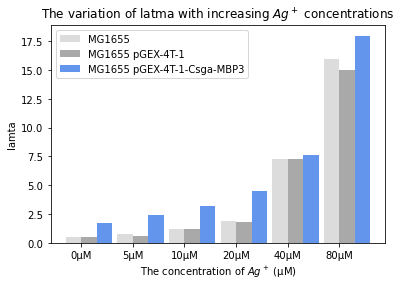

In [16]:
Ag = ('0μM', '5μM', '10μM', '20μM', '40μM', '80μM')
yesheng = [0.46, 0.73, 1.19, 1.86, 7.30, 16]
kong = [0.50, 0.58, 1.18, 1.77, 7.3, 15]
csga = [1.71, 2.43, 3.15, 4.46, 7.63, 18]

bar_width = 0.3 
index_yesheng = np.arange(len(Ag))
index_kong = index_yesheng + bar_width
index_csga = index_yesheng + 2*bar_width

plt.bar(index_yesheng, height=yesheng, width=bar_width,color='#DCDCDC', label='MG1655')
plt.bar(index_kong, height=kong, width=bar_width,color='#A9A9A9', label='MG1655 pGEX-4T-1')
plt.bar(index_csga, height=csga, width=bar_width,color='#6495ED', label='MG1655 pGEX-4T-1-Csga-MBP3')

plt.legend() 
plt.xticks((index_yesheng + bar_width/2), Ag) 
plt.xlabel('The concentration of $Ag^+$ (μM)')
plt.ylabel('lamta') 
plt.title('The variation of latma with increasing $Ag^+$ concentrations') 
plt.show()

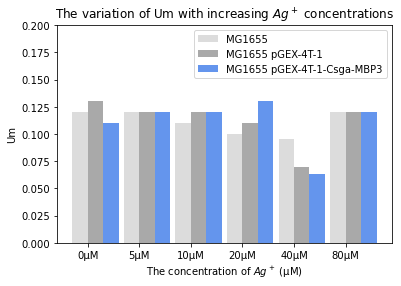

In [17]:
Um0 = [0.12,0.13,0.11]
Um5 = [0.12,0.12,0.12]
Um10 = [0.11,0.12,0.12]
Um20 = [0.10,0.11,0.13]
Um40 = [0.10,0.07,0.063]
Um80 = [0.12,0.12,0.12]

Ag = ('0μM', '5μM', '10μM', '20μM', '40μM', '80μM')
yesheng = [0.12, 0.12, 0.11, 0.10, 0.095, 0.12]
kong = [0.13, 0.12, 0.12, 0.11, 0.07, 0.12]
csga = [0.11, 0.12, 0.12, 0.13, 0.063, 0.12]

bar_width = 0.3 
index_yesheng = np.arange(len(Ag))
index_kong = index_yesheng + bar_width
index_csga = index_yesheng + 2*bar_width

plt.bar(index_yesheng, height=yesheng, width=bar_width, color='#DCDCDC', label='MG1655')
plt.bar(index_kong, height=kong, width=bar_width,color='#A9A9A9', label='MG1655 pGEX-4T-1')
plt.bar(index_csga, height=csga, width=bar_width,color='#6495ED', label='MG1655 pGEX-4T-1-Csga-MBP3')

plt.legend() 
plt.xticks((index_yesheng + bar_width/2), Ag) 
plt.ylim(0, 0.2)
plt.xlabel('The concentration of $Ag^+$ (μM)')
plt.ylabel('Um') 
plt.title('The variation of Um with increasing $Ag^+$ concentrations') 
plt.show()